In [2]:
import numpy as np
import pandas as pd

In [4]:
col_names = ['date','avgtemp', 'mintemp', 'pp', 'snow', 'wind-dir', 'wind-speed', 'wind-gut', 'air-pressure', 'sunshine', 'dummy']
        
daily_weather_df = pd.read_csv('KCQT0.csv',sep=',',names=col_names,header=None)

#Delete irrelevant cols
del daily_weather_df['dummy']
del daily_weather_df['air-pressure']
del daily_weather_df['wind-speed']
del daily_weather_df['snow']
del daily_weather_df['wind-dir']
del daily_weather_df['date']
del daily_weather_df['mintemp']


In [5]:
daily_weather_df.head()

,avgtemp,pp,wind-gut,sunshine
0,10.4,13.9,2.0,1018.9
1,12.0,15.6,8.1,1021.0
2,11.4,18.9,1.3,1026.5
3,12.6,20.0,3.0,1024.9
4,13.3,21.7,1.9,1018.0


In [6]:
#get temperatures of the last 365 days
daily_temp = daily_weather_df['avgtemp'].to_numpy()[-365:]
print(f"the first 10 entries in daily_temp are {daily_temp[:10]}")

mean_temp = np.nanmean(daily_temp)  #find the meand ignore the NaN values
variance = np.nanvar(daily_temp)
print(f"Mean tempreature is {mean_temp} celsius")
print(f"Variance is {variance}")

the first 10 entries in daily_temp are [13.7 13.8 16.3 20.3 18.5 17.2 21.5 22.6 17.8 15.6]
Mean tempreature is 17.9586301369863 celsius
Variance is 14.816672096078067


In [7]:
print(daily_weather_df.isnull().sum())

avgtemp       9
pp            9
wind-gut    208
sunshine    224
dtype: int64


In [8]:
daily_weather_df.shape

(2758, 4)

In [9]:
weather_features = daily_weather_df.drop(['pp'], axis=1)
print(weather_features.head())

   avgtemp  wind-gut  sunshine
0     10.4       2.0    1018.9
1     12.0       8.1    1021.0
2     11.4       1.3    1026.5
3     12.6       3.0    1024.9
4     13.3       1.9    1018.0


In [10]:
X = daily_weather_df.drop(['pp'],axis=1).iloc[:,:].values
X[:10]

array([[  10.4,    2. , 1018.9],
       [  12. ,    8.1, 1021. ],
       [  11.4,    1.3, 1026.5],
       [  12.6,    3. , 1024.9],
       [  13.3,    1.9, 1018. ],
       [  12.5,    2.4, 1024.4],
       [  12.2,    2.5, 1023.4],
       [  11. ,    1.9, 1020.9],
       [  11.2,    1.9, 1020.9],
       [  12.7,    2.2, 1019.3]])

In [11]:
y = daily_weather_df.iloc[:,1:2].values
y[:10]

array([[13.9],
       [15.6],
       [18.9],
       [20. ],
       [21.7],
       [20. ],
       [18.3],
       [18.3],
       [17.8],
       [18.3]])

In [12]:
#simple imputer
from sklearn.impute import SimpleImputer
imp_data = SimpleImputer(missing_values=np.nan, strategy='mean')
X = imp_data.fit_transform(X)

In [13]:
#simple imputer
from sklearn.impute import SimpleImputer
imp_test = SimpleImputer(missing_values=np.nan, strategy='mean')
y = imp_test.fit_transform(y)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10,shuffle=True)
#shuffle xao tron du lieu

print(f"Training data: {X_train.shape}, {y_train.shape}")
print(f"Test data: {X_test.shape},{y_test.shape}")


Training data: (1930, 3), (1930, 1)
Test data: (828, 3),(828, 1)


In [15]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(max_depth=4)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4)

[Text(0.5, 0.9, 'X[0] <= 18.15\nsquared_error = 23.6\nsamples = 1930\nvalue = 23.197'),
 Text(0.25, 0.7, 'X[0] <= 15.15\nsquared_error = 9.351\nsamples = 1020\nvalue = 19.726'),
 Text(0.125, 0.5, 'X[0] <= 11.95\nsquared_error = 5.972\nsamples = 537\nvalue = 17.875'),
 Text(0.0625, 0.3, 'X[2] <= 1016.7\nsquared_error = 4.357\nsamples = 105\nvalue = 15.093'),
 Text(0.03125, 0.1, 'squared_error = 3.055\nsamples = 42\nvalue = 13.695'),
 Text(0.09375, 0.1, 'squared_error = 3.053\nsamples = 63\nvalue = 16.025'),
 Text(0.1875, 0.3, 'X[1] <= 4.25\nsquared_error = 4.027\nsamples = 432\nvalue = 18.551'),
 Text(0.15625, 0.1, 'squared_error = 3.832\nsamples = 313\nvalue = 19.01'),
 Text(0.21875, 0.1, 'squared_error = 2.53\nsamples = 119\nvalue = 17.345'),
 Text(0.375, 0.5, 'X[0] <= 16.55\nsquared_error = 5.062\nsamples = 483\nvalue = 21.784'),
 Text(0.3125, 0.3, 'X[2] <= 1017.05\nsquared_error = 4.391\nsamples = 243\nvalue = 20.955'),
 Text(0.28125, 0.1, 'squared_error = 2.732\nsamples = 143\nvalu

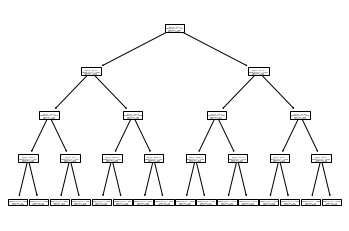

In [16]:
from sklearn import tree
tree.plot_tree(tree_reg)

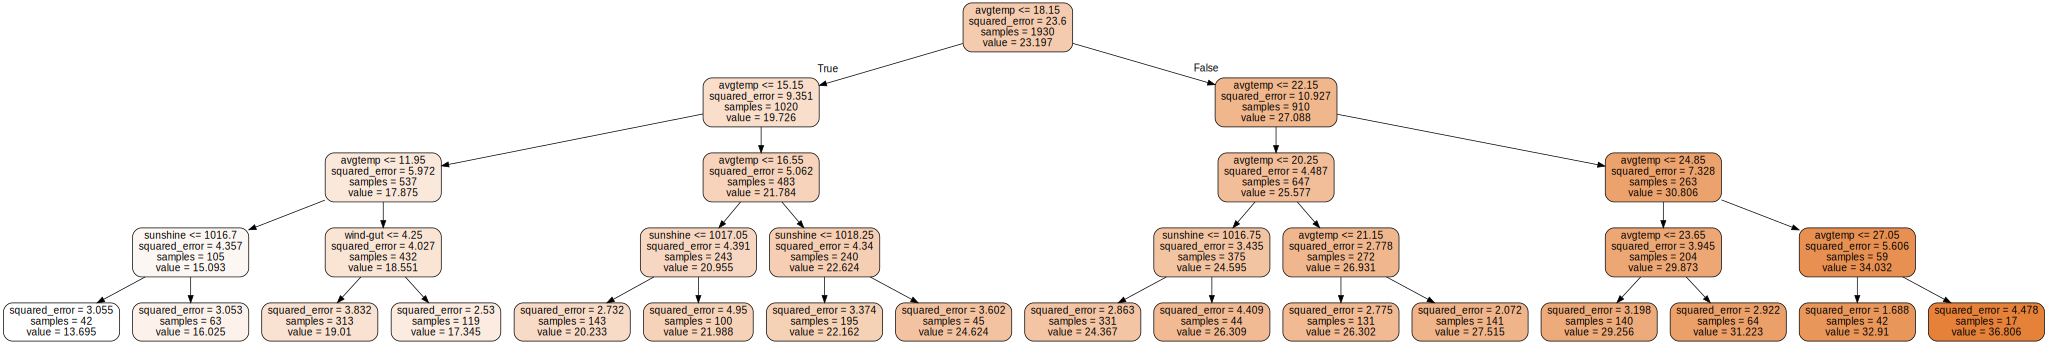

In [17]:
#visual
from sklearn.tree import export_graphviz
import graphviz
dot_data = export_graphviz(
    tree_reg,
    out_file=None,
    feature_names=weather_features.columns,
    rounded=True,
    filled=True
)

prettier_graph = graphviz.Source(dot_data)  
prettier_graph.saveIMG

In [18]:
# test predictions
y_pred = tree_reg.predict(X_test)

In [19]:
type(y_pred), y_pred.shape

(numpy.ndarray, (828,))

In [20]:
y_pred[:10]

array([27.51489362, 20.23286713, 19.00958466, 24.3673716 , 24.62444444,
       16.02539683, 26.30152672, 26.30152672, 22.16211695, 21.988     ])

In [21]:
import matplotlib.pyplot as plt

In [41]:
from sklearn.metrics import accuracy_score

y_pred2 = y_pred.reshape(828,1)
print(y_test.shape,y_pred2.shape)

(828, 1) (828, 1)


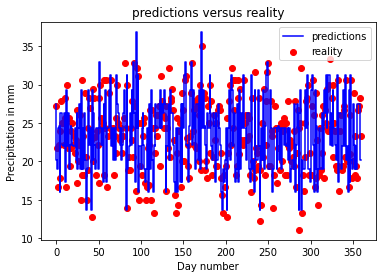

In [47]:
fig= plt.figure()
plt.scatter(range(360),y_test[:360],color='r',label='reality')
plt.step(range(360),y_pred[:360],color='b',label='predictions')

plt.title('predictions versus reality')
plt.xlabel('Day number')
plt.ylabel('Precipitation in mm')
plt.legend()